In [164]:
import numpy as np
import pandas as pd

In [165]:
DATA_DIR = './'

In [166]:
df_ttn = pd.read_csv(f"{DATA_DIR}/train.csv", index_col=0)



df_ttn.head(4)



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [167]:
Miss0 = df_ttn['Name'].str.contains('Miss\.')

In [168]:
Miss0

PassengerId
1      False
2      False
3       True
4      False
5      False
       ...  
887    False
888     True
889     True
890    False
891    False
Name: Name, Length: 891, dtype: bool

In [169]:
Miss1 = df_ttn[Miss0]

In [170]:
#miss 라는 이름을 가지는 사람들의 평균나이 를 구해서 
Miss1 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [171]:
df_ttn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [172]:
import warnings
warnings.filterwarnings(action='ignore')

In [173]:
from matplotlib import pyplot as plt
import seaborn as sns


<Axes: >

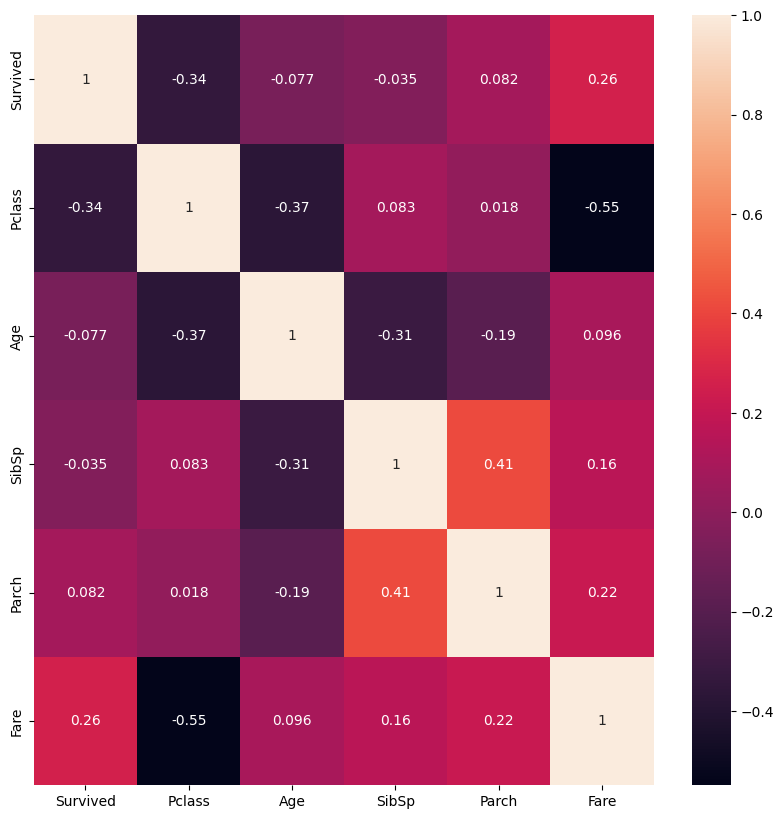

In [174]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df_ttn.corr(), annot=True)

In [175]:
df_ttn['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [176]:
Miss0 = df_ttn['Name'].str.contains('Miss\.')
Mr0 = df_ttn['Name'].str.contains('Mr\.')
Mrs0 = df_ttn['Name'].str.contains('Mrs\.')
Master0 = df_ttn['Name'].str.contains('Master\.')



Miss1 = df_ttn[Miss0]
Mr1 = df_ttn[Mr0]
Mrs1 = df_ttn[Mrs0]
Master1 = df_ttn[Master0]


In [253]:
Mr1['Age']

PassengerId
1      22.0
5      35.0
6       NaN
7      54.0
13     20.0
       ... 
882    33.0
884    28.0
885    25.0
890    26.0
891    32.0
Name: Age, Length: 517, dtype: float64

In [177]:
mr_t = df_ttn.loc[df_ttn['Name'].str.contains('Mr\.') & df_ttn['Age'].notnull()]


In [178]:
mr_t['Age'].median()

30.0

In [179]:
mr_t1 = df_ttn.loc[(df_ttn['Age'] >= 30) & df_ttn['Name'].str.contains('Mr\.') ]

In [180]:
mr_t2 = df_ttn.loc[(df_ttn['Age'] < 30) & df_ttn['Name'].str.contains('Mr\.') ]

In [255]:
mr_t1.mean()

Survived     0.185000
Pclass       2.115000
Age         42.020000
SibSp        0.245000
Parch        0.215000
Fare        30.823208
dtype: float64

In [182]:
mr_t2.mean()

Survived     0.151515
Pclass       2.601010
Age         22.618687
SibSp        0.323232
Parch        0.141414
Fare        21.526513
dtype: float64

In [183]:
mr_t['Fare'].median()

10.5

In [184]:
mr_t3 = df_ttn.loc[(df_ttn['Fare'] >= 10.5) & df_ttn['Name'].str.contains('Mr\.') & df_ttn['Age'].notnull()]

In [261]:
mr_t4 = df_ttn.loc[(df_ttn['Fare'] < 10.5) & df_ttn['Name'].str.contains('Mr\.') & df_ttn['Age'].notnull()]

In [186]:
mr_t3.mean()

Survived     0.210784
Pclass       1.774510
Age         35.482843
SibSp        0.470588
Parch        0.328431
Fare        43.869179
dtype: float64

In [187]:
mr_t4.mean()

Survived     0.123711
Pclass       2.969072
Age         29.092784
SibSp        0.087629
Parch        0.020619
Fare         7.616385
dtype: float64

In [188]:
mr_t5 = (mr_t1['Age'].mean() + mr_t3['Age'].mean()) / 2
mr_t5.round(1)

38.8

In [189]:
mr_t6 = (mr_t2['Age'].mean() + mr_t4['Age'].mean()) / 2
mr_t6.round(1)

25.9

In [190]:
Miss1['Age'].mean().__round__(1)

21.8

In [191]:
Master1['Age'].mean()

4.574166666666667

In [192]:
p1 = df_ttn['Pclass']

In [193]:
p1.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [208]:
n = df_ttn.loc[p1 == 1]['Cabin']

In [209]:
df_ttn.loc[p1 == 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [207]:
df_ttn.loc[p1 == 1]['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
C22 C26        3
E24            2
E67            2
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 133, dtype: int64

In [248]:
df_ttn.loc[(p1 == 2)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...
867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [247]:
df_ttn.loc[df_ttn['Pclass'] == 1 & df_ttn['Ticket'].str.startswith('1')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [233]:
df_ttn.loc[(p1 == 3) & df_ttn['Ticket'].str.startswith('2')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,NaN,C
61,0,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.2292,NaN,C
66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
74,0,3,"Chronopoulos, Mr. Apostolos",male,26.00,1,0,2680,14.4542,NaN,C


In [198]:
a = df_ttn.dropna(subset=['Cabin'])

a = a[a['Cabin'].str.contains('A')]

asu = a['Survived'].sum()/len(a)
asu.round(2)

0.47

In [199]:
b = df_ttn.dropna(subset=['Cabin'])

b = b[b['Cabin'].str.contains('B')]

bsu = b['Survived'].sum()/len(b)
bsu.round(2)

0.74

In [200]:
c = df_ttn.dropna(subset=['Cabin'])

c = c[c['Cabin'].str.contains('C')]

csu = c['Survived'].sum()/len(c)
csu.round(2)

0.59

In [201]:
d = df_ttn.dropna(subset=['Cabin'])

d = d[d['Cabin'].str.contains('D')]

dsu = d['Survived'].sum()/len(d)
dsu.round(2)

0.76

In [202]:
e = df_ttn.dropna(subset=['Cabin'])

e = e[e['Cabin'].str.contains('E')]

esu = e['Survived'].sum()/len(e)
esu.round(2)

0.76

In [203]:
a4 = a[a['Cabin'].str.contains('A')]

In [204]:
a4['Fare'].mean()

39.623886666666664

In [205]:
df_ttn.loc[p1 == 1]['Fare'].mean()

84.1546875

In [206]:
round(df_ttn['Survived'].sum()/len(df_ttn),2)

0.38